<a href="https://colab.research.google.com/github/keithferns98/ML_Models/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [3]:
data=pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

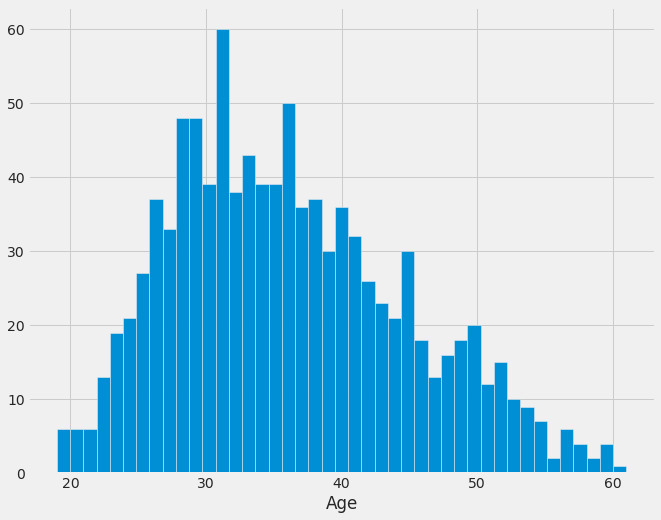

In [6]:
#1. Exploratory Data Analysis
plt.figure(figsize=(10,8))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


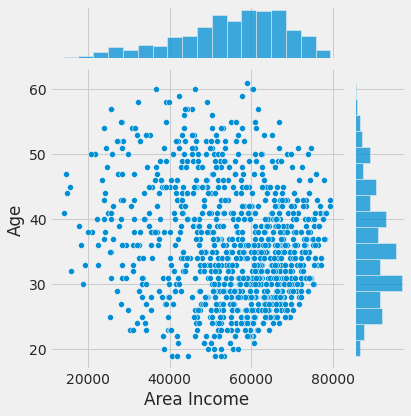

In [8]:
sns.jointplot(data['Area Income'],data.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


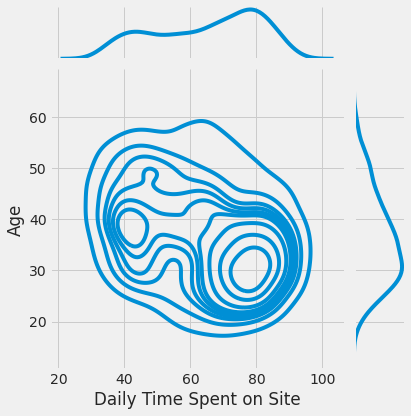

In [9]:
sns.jointplot(data['Daily Time Spent on Site'],data.Age,kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


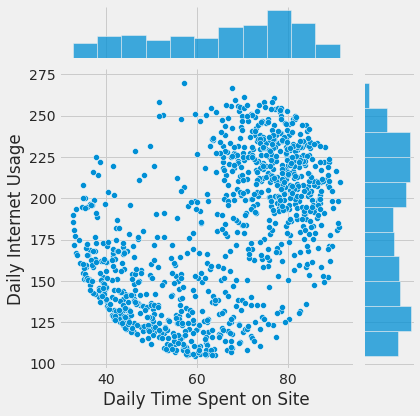

In [10]:
sns.jointplot(data['Daily Time Spent on Site'],data['Daily Internet Usage'])

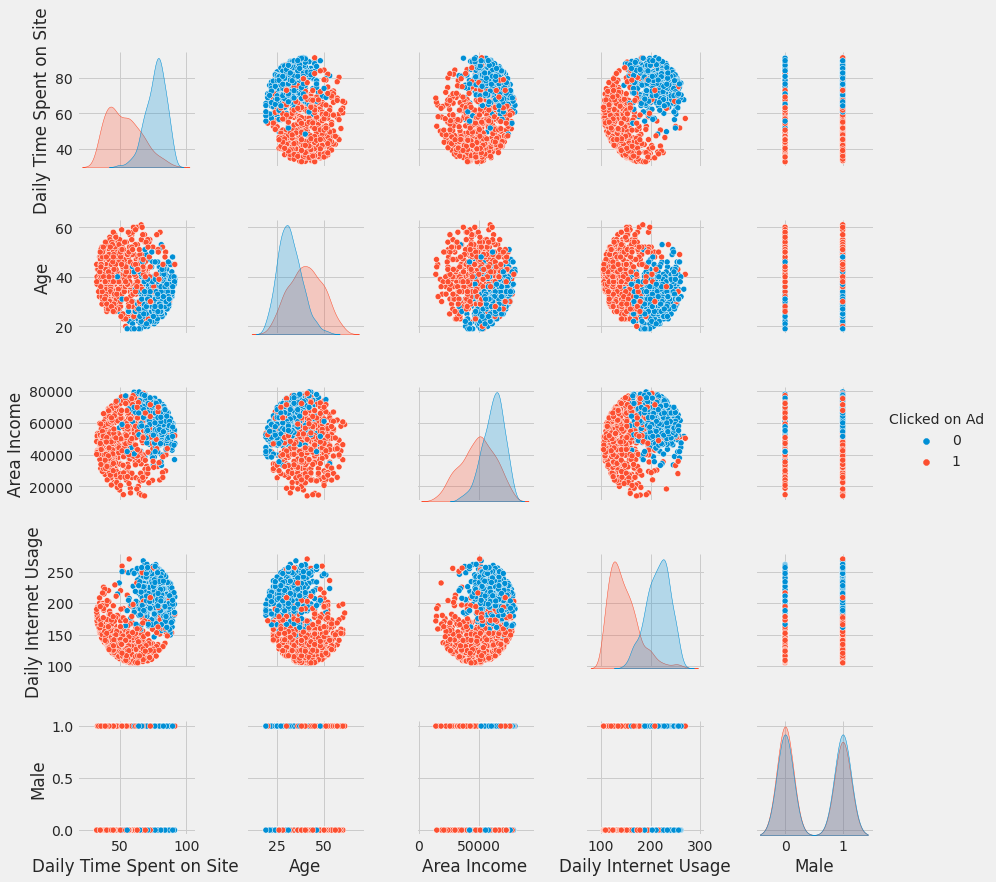

In [11]:
sns.pairplot(data,hue='Clicked on Ad')

In [12]:
data['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

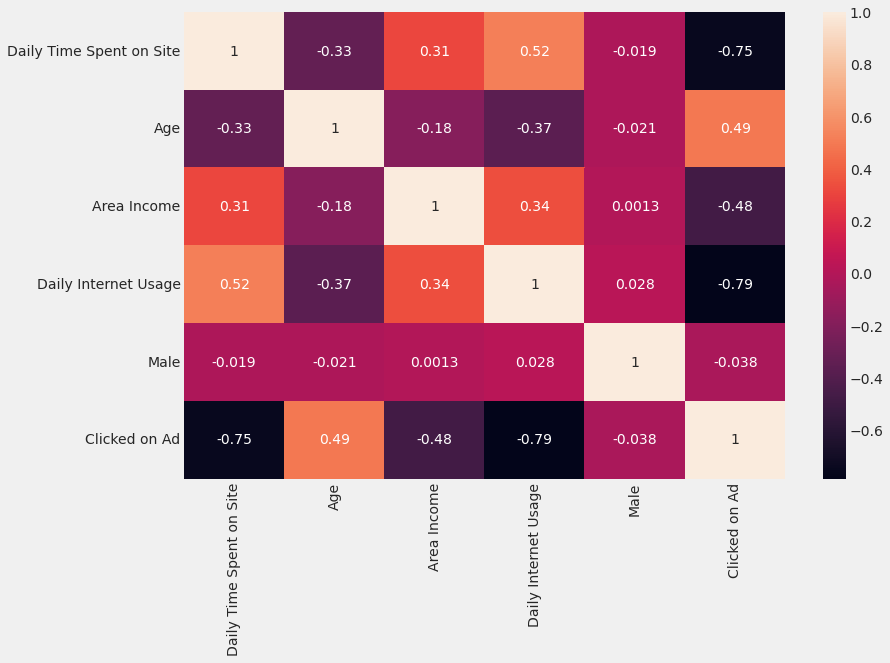

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

2. Theory Behind Logistic Regression
Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand and gets great results on a wide variety of problems, even when the expectations the method has for your data are violated.

Description
Logistic Regression
Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the Sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

1/(1+e^−x)
 
e  is the base of the natural logarithms and  x  is value that you want to transform via the logistic function.

Text(0.5, 1.0, 'SigmoidFunction')

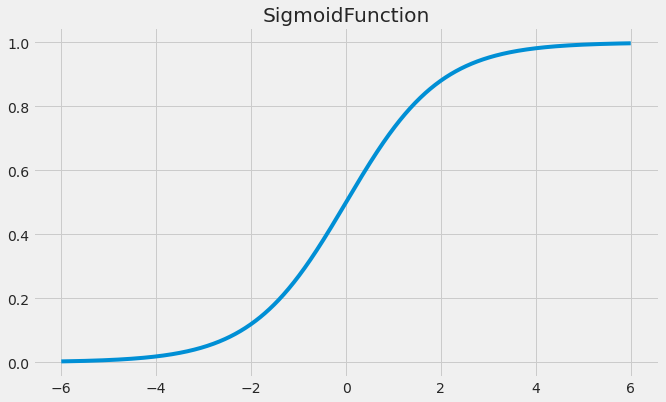

In [15]:
x=np.linspace(-6,6,num=1000)
plt.figure(figsize=(10,6))
plt.plot(x,(1/(1+np.exp(-x))))
plt.title('SigmoidFunction')

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def print_score(clf,X_train,y_train,X_test,y_test,train=True):
    if train:
        pred=clf.predict(X_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train,pred)*100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"CONFUSION_MATRIX: \n {confusion_matrix(y_train,pred)}\n")

    elif train==False:
        pred=clf.predict(X_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy_score: {accuracy_score(y_test,pred)*100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X=data.drop(['Timestamp','Clicked on Ad','Ad Topic Line','Country','City'],axis=1)
y=data['Clicked on Ad']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

num_cols=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']

ct=make_column_transformer(
    (MinMaxScaler(),num_cols),
    (StandardScaler(),num_cols),
    remainder='passthrough'
)
X_train=ct.fit_transform(X_train)
X_test=ct.fit_transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)


print_score(lr_clf,X_train,y_train,X_test,y_test,train=False)

Test Result:
Accuracy_score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.953642    0.986577      0.97    0.970110      0.970549
recall       0.986301    0.954545      0.97    0.970423      0.970000
f1-score     0.969697    0.970297      0.97    0.969997      0.970005
support    146.000000  154.000000      0.97  300.000000    300.000000
_______________________________________________
Confusion Matrix: 
 [[144   2]
 [  7 147]]



In [25]:
print_score(lr_clf,X_train,y_train,X_test,y_test,train=True)

Train Result:
Accuracy Score: 97.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.964088    0.985207  0.974286    0.974648      0.974527
recall       0.985876    0.962428  0.974286    0.974152      0.974286
f1-score     0.974860    0.973684  0.974286    0.974272      0.974279
support    354.000000  346.000000  0.974286  700.000000    700.000000
_______________________________________________
CONFUSION_MATRIX: 
 [[349   5]
 [ 13 333]]



In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    354.0  346.0       1.0      700.0         700.0
_______________________________________________
CONFUSION_MATRIX: 
 [[354   0]
 [  0 346]]

Test Result:
Accuracy_score: 95.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.945946    0.960526  0.953333    0.953236      0.953431
recall       0.958904    0.948052  0.953333    0.953478      0.953333
f1-score     0.952381    0.954248  0.953333    0.953315      0.953340
support    146.000000  154.000000  0.953333  300.000000    300.000000
_______________________________________________

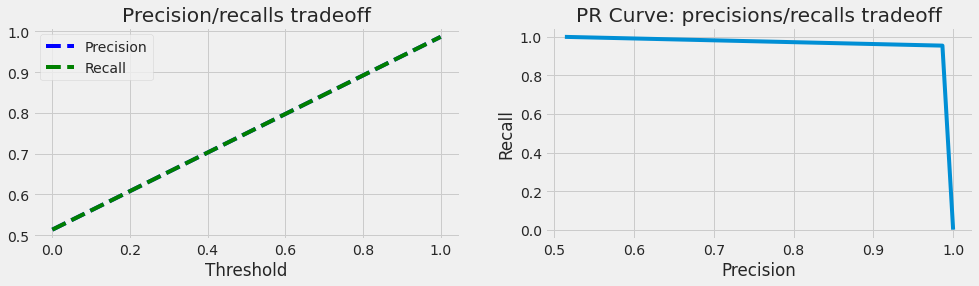

In [27]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,precisions[:-1],'g--',label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/recalls tradeoff")
precisions,recalls,thresholds=precision_recall_curve(y_test,lr_clf.predict(X_test))

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

plt.subplot(2,2,2)
plt.plot(precisions,recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

In [29]:
#HyperParameter tuning

from sklearn.model_selection import GridSearchCV

lr_clf=LogisticRegression()
penalty=['l1','l2']
C=[0.5,0.6,0.7,0.8]
class_weight=[{1:0.5,0:0.5},{1:0.4,0:0.6},{1:0.6,0:0.4},{1:0.7,0:0.3}]
solver=['liblinear','saga']

param_grid=dict(penalty=penalty,C=C,class_weight=class_weight,solver=solver)

lr_cv=GridSearchCV(estimator=lr_clf,param_grid=param_grid,scoring='accuracy',verbose=1,n_jobs=-1,cv=10,iid=True)

lr_cv.fit(X_train,y_train)
best_params=lr_cv.best_params_
print(f"Best_Params: {best_params}")
lr_clf=LogisticRegression(**best_params)
lr_clf.fit(X_train,y_train)

print_score(lr_clf,X_train,y_train,X_test,y_test,train=True)
print_score(lr_clf,X_train,y_train,X_test,y_test,train=False)


Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best_Params: {'C': 0.6, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}
Train Result:
Accuracy Score: 97.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.961433    0.985163  0.972857    0.973298      0.973162
recall       0.985876    0.959538  0.972857    0.972707      0.972857
f1-score     0.973501    0.972182  0.972857    0.972841      0.972849
support    354.000000  346.000000  0.972857  700.000000    700.000000
_______________________________________________
CONFUSION_MATRIX: 
 [[349   5]
 [ 14 332]]

Test Result:
Accuracy_score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.947368    0.986486  0.966667    0.966927      0.967449
recall       0.986301    0.948052  0.966667    0.967177      0.966667
f1-score     0.966443    0.966887  0.966

[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    2.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
